# Linear Regression with PyTorch

In [1]:
# Installation
%pip install torch
%pip install matplotlib

# Imports
import torch
from torch.nn import Linear
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Simple Linear Prediction

In [2]:
# Variables
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [3]:
# Forward Function
def forward(x):
	y = w * x + b
	return y

In [4]:
# Single Value
x = torch.tensor(2)

# Multiple Values
x = torch.tensor([2, 3, 4])

# Make a Prediction
forward(x)

tensor([ 7., 10., 13.], grad_fn=<AddBackward0>)

## Simple Linear Regression with Linear PyTorch Class

In [5]:
# Set the Seed
torch.manual_seed(1)

# Create a Model
model = Linear(in_features=1, out_features=1)

# Print the Parameters
print(model.bias, model.weight)

Parameter containing:
tensor([-0.4414], requires_grad=True) Parameter containing:
tensor([[0.5153]], requires_grad=True)


In [6]:
# Make a prediction
x = torch.tensor([2.0])
model(x)

tensor([0.5891], grad_fn=<AddBackward0>)

## Custom Module

In [7]:
# Linear Regression Model Class
class LinearRegression(nn.Module):
	def __init__(self, input_dim, output_dim):
		super().__init__()
		self.linear = nn.Linear(input_dim, output_dim)
	def forward(self, x):
		pred = self.linear(x)
		return pred

In [8]:
# Define linear regression model using custom linear regression class
linear_regression_model = LinearRegression(1, 1)

In [9]:
# Get model parameters
list(linear_regression_model.parameters())

[Parameter containing:
 tensor([[-0.1939]], requires_grad=True),
 Parameter containing:
 tensor([0.4694], requires_grad=True)]

In [10]:
# Make a prediction
linear_regression_model.forward(torch.tensor([1.0]))

tensor([0.2755], grad_fn=<AddBackward0>)

## Creating a Dataset

In [11]:
# Generate random data centered around 10 with noise
X = torch.randn(100, 1) * 10
y = X + torch.randn(100, 1) * 3

Text(0.5, 0, 'X')

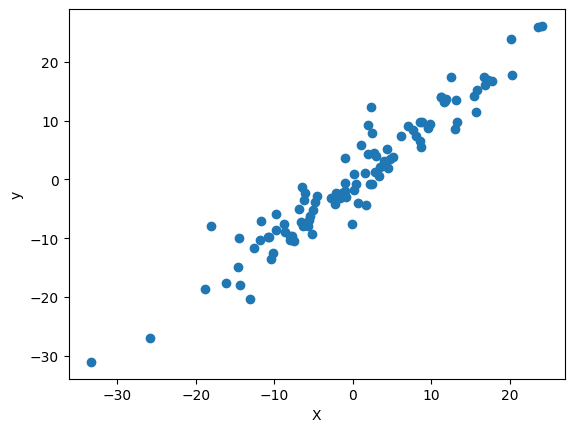

In [12]:
# Plot the dataset
plt.plot(X.numpy(), y.numpy(), 'o')

# Add lables
plt.ylabel('y')
plt.xlabel('X')

## Training the Model to Fit the Data

In [13]:
# Get model parameters
[w, b] = linear_regression_model.parameters()

# Helper function to get the parameters
def get_params():
	return (w[0][0].item(), b[0].item())

In [14]:
# Helper function to plot the fit
def plot_fit(title):
	plt.title = title
	w1, b1 = get_params()
	x1 = np.array([-30, 30])
	y1 = w1 * x1 + b1
	plt.plot(x1, y1, 'r')
	plt.scatter(X, y)
	plt.show()

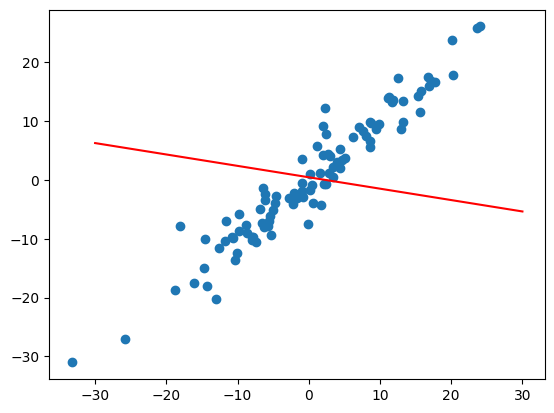

In [15]:
# Plot the initial model
plot_fit('Initial Model')

In [16]:
# Loss Function
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear_regression_model.parameters(), lr = 0.01)

# Number of epochs (passes)
epochs = 100

# Track losses
losses = []

# Training loop
for epoch in range(epochs):
	# Forward pass
	y_pred = linear_regression_model.forward(X)

	# Compute loss
	loss = criterion(y_pred, y)
	losses.append(loss.item())

	# Print the epoch and loss
	print('epoch:', epoch, 'loss:', loss.item())
	
	# Set the gradients to zero
	optimizer.zero_grad()

	# Backward pass
	loss.backward()

	# Update the weights
	optimizer.step()

epoch: 0 loss: 170.33042907714844
epoch: 1 loss: 282.6071472167969
epoch: 2 loss: 473.1928405761719
epoch: 3 loss: 796.7025146484375
epoch: 4 loss: 1345.840576171875
epoch: 5 loss: 2277.966552734375
epoch: 6 loss: 3860.183837890625
epoch: 7 loss: 6545.8857421875
epoch: 8 loss: 11104.6728515625
epoch: 9 loss: 18842.8671875
epoch: 10 loss: 31977.921875
epoch: 11 loss: 54273.69140625
epoch: 12 loss: 92119.1171875
epoch: 13 loss: 156358.90625
epoch: 14 loss: 265401.15625
epoch: 15 loss: 450492.46875
epoch: 16 loss: 764672.0
epoch: 17 loss: 1297967.875
epoch: 18 loss: 2203198.0
epoch: 19 loss: 3739757.5
epoch: 20 loss: 6347956.0
epoch: 21 loss: 10775180.0
epoch: 22 loss: 18290060.0
epoch: 23 loss: 31046010.0
epoch: 24 loss: 52698300.0
epoch: 25 loss: 89451416.0
epoch: 26 loss: 151837168.0
epoch: 27 loss: 257732320.0
epoch: 28 loss: 437481504.0
epoch: 29 loss: 742592768.0
epoch: 30 loss: 1260497024.0
epoch: 31 loss: 2139601024.0
epoch: 32 loss: 3631814144.0
epoch: 33 loss: 6164737536.0
epoch

## Plot the Losses

[170.33042907714844, 282.6071472167969, 473.1928405761719, 796.7025146484375, 1345.840576171875, 2277.966552734375, 3860.183837890625, 6545.8857421875, 11104.6728515625, 18842.8671875, 31977.921875, 54273.69140625, 92119.1171875, 156358.90625, 265401.15625, 450492.46875, 764672.0, 1297967.875, 2203198.0, 3739757.5, 6347956.0, 10775180.0, 18290060.0, 31046010.0, 52698300.0, 89451416.0, 151837168.0, 257732320.0, 437481504.0, 742592768.0, 1260497024.0, 2139601024.0, 3631814144.0, 6164737536.0, 10464179200.0, 17762166784.0, 30149976064.0, 51177312256.0, 86869737472.0, 147454787584.0, 250293649408.0, 424854978560.0, 721159913472.0, 1224116142080.0, 2077848240128.0, 3526992592896.0, 5986801680384.0, 10162154766336.0, 17249498824704.0, 29279769329664.0, 49700216504320.0, 84362443882496.0, 143199007932416.0, 243069899243520.0, 412593382490112.0, 700346091438080.0, 1188784804724736.0, 2017870930247680.0, 3425187563307008.0, 5814001128701952.0, 9868837340053504.0, 1.675162873233408e+16, 2.843467

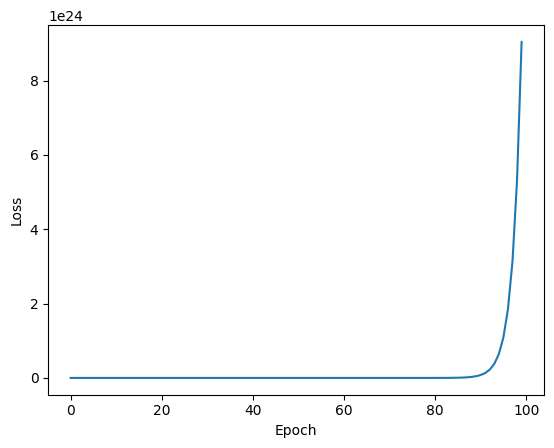

In [17]:
plt.plot(range(epochs), losses)
print(losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

## Line of Best Fit

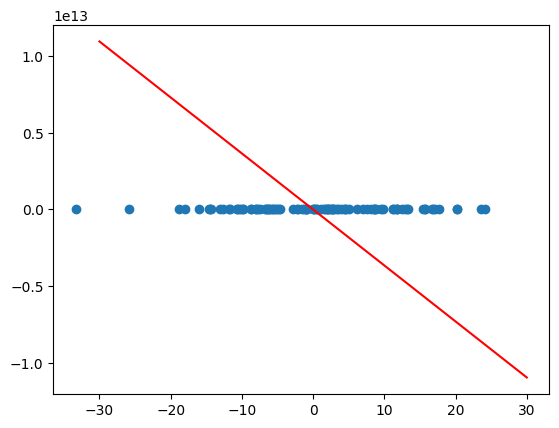

In [18]:
# Plot the trained model (line of best fit)
plot_fit('Trained Model')